In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
file = pd.read_csv('D:\Data Science in Python\DeepLearning\Gradient Descent Types\homeprices_banglore.csv')
file

,area,bedrooms,price
0,1056,2,39.07
1,2600,4,120.00
2,1440,3,62.00
3,1521,3,75.00
4,1200,2,51.00
5,1170,2,38.00
6,2732,4,135.00
7,3300,4,155.00
8,1310,3,50.00
9,3700,5,167.00


In [3]:
from sklearn import preprocessing
#creating variables for class MinMaxScaler.
#this class belongs to the preprocessing module of sklearn library
s_X = preprocessing.MinMaxScaler()
s_Y = preprocessing.MinMaxScaler()

In [46]:
scaled_X = s_X.fit_transform(file.drop('price',axis='columns'))
scaled_Y = s_Y.fit_transform(file['price'].values.reshape(file.shape[0],1))
remove = 5
scaled_X = scaled_X[:-remove]
scaled_Y = scaled_Y[:-remove]
# scaled_X.drop(scaled_X.tail(5).index, inplace= True)
# scaled_Y.drop(scaled_Y.tail(5).index, inplace= True)
# len = scaled_YI.size
# scaled_X=[] 
# scaled_Y=[]


# for i in range (len-5):
    
#     scaled_X[i] = scaled_XI[i]
#     scaled_Y[i] = scaled_YI[i]

# scaled_X = s_X.fit_transform(file.drop('price',axis='columns'))
# scaled_Y = s_Y.fit_transform(file['price'].values.reshape(file.shape[0],1))

In [ ]:
scaled_X

In [48]:
def batch_gradient_descent(X, y_true, epochs, learning_rate=0.01):
    no_of_features = X.shape[1]

    # creating an array for weights w1 and w2 with 1 as initial values
    w = np.ones(shape=(no_of_features))
    b = 0
    total_samples = X.shape[0]
    #creating lists to record values and use them to plot a graph
    cost_list = []
    epoch_list= []
    for i in range (epochs):
        y_predicted = np.dot(w,scaled_X.T)+b #where predicted value = ((feature1 x w1) + (feature2 x w2) + b )

        w_d= -(2/total_samples)*(X.T.dot(y_true - y_predicted ))
        b_d = -(2/total_samples)*np.sum(y_true - y_predicted )
        # Adjusting weights and biases.
        w = w-learning_rate*w_d
        b = b-learning_rate*b_d

        cost = np.mean(np.square(y_true - y_predicted ))  #mean square error

        if i%10==0:
            #this code will be executed for all epochs that are divisible by 10.
            cost_list.append(cost)
            epoch_list.append(i)
    
    return w,b,cost,cost_list,epoch_list


w,b,cost,cost_list,epoch_list = batch_gradient_descent(scaled_X, scaled_Y.reshape(scaled_Y.shape[0]),20000)
w,b,cost


(array([0.9134891 , 0.25825233]), -0.08825335402952612, 0.0017953545600464084)

In [26]:
scaled_Y.shape

(1,)

 At 500 Epochs we got:
 w1= 0.70712464, w2= 0.67456527, bias= -0.23034857438407427, cost= 0.0068641890429808105

 At 2000 Epochs we got:
 w1= 0.9134891 , w2= 0.25825233, bias= -0.08825335402952612, cost= 0.0017953545600464084

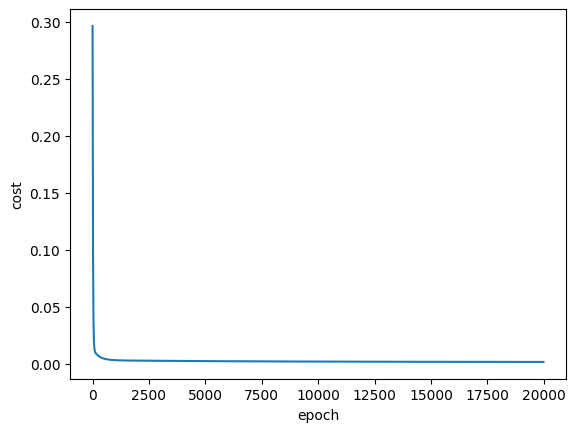

In [49]:

plt.xlabel('epoch')
plt.ylabel('cost')
plt.plot(epoch_list, cost_list)


In [23]:
w

array([0.67110387, 0.53381704])

In [50]:
def predict (area, bedrooms , w , b):
    scaled_X = s_X.transform([[area, bedrooms]])[0]
    predicted_price = w[0]*scaled_X[0] + w[1]*scaled_X[1] + b
    return s_Y.inverse_transform([[predicted_price]])[0][0]
    

predict(2600,4,w,b)



C:\Users\NR\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


122.77793176273913

In [56]:
predict(1056,	2		,w,b)

C:\Users\NR\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


39.688083281282495